In [2]:
# 用Python读取第一个数据集IR007_0结果如下
from scipy import io as scio
mat_fileName = '1/97.mat'
data = scio.loadmat(mat_fileName )  # 读出来的数据是字典dict型
data 

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 15:28:20 2000',
 '__version__': '1.0',
 '__globals__': [],
 'X097_DE_time': array([[ 0.05319692],
        [ 0.08866154],
        [ 0.09971815],
        ...,
        [-0.03463015],
        [ 0.01668923],
        [ 0.04693846]]),
 'X097_FE_time': array([[0.14566727],
        [0.09779636],
        [0.05485636],
        ...,
        [0.14053091],
        [0.09553636],
        [0.09019455]]),
 'X097RPM': array([[1796]], dtype=uint16)}

In [9]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
 
# Assuming your filenames are as follows:
file_names = ['097','109', '122', '135', '173', '189', '201', '213', '226', '238']
data_columns = [f'X{filename}_DE_time' for filename in file_names]
# columns_name = [f'de_{filename}' for filename in file_names]
columns_name = ['de_normal','de_7_inner','de_7_ball','de_7_outer','de_14_inner','de_14_ball','de_14_outer','de_21_inner','de_21_ball','de_21_outer']
 
data_12k_1797_10c = pd.DataFrame()  # 名称表示10类
 
 
for index in range(10):
    data = loadmat(f'1/{file_names[index]}.mat')
    dataList = data[data_columns[index]].reshape(-1)
    data_12k_1797_10c[columns_name[index]] = dataList[:63788]  # 121048  min: 121265
print(data_12k_1797_10c.shape)
data_12k_1797_10c

(63788, 10)


,de_normal,de_7_inner,de_7_ball,de_7_outer,de_14_inner,de_14_ball,de_14_outer,de_21_inner,de_21_ball,de_21_outer
0,0.053197,0.010016,-0.111192,0.893511,0.181957,0.039846,0.609157,0.851568,0.171524,0.013355
1,0.088662,-0.023788,-0.083029,0.588440,0.203241,0.089705,0.675914,0.628767,0.326772,-0.345552
2,0.099718,-0.007929,-0.042349,0.154413,0.211588,0.136643,0.730988,0.315844,0.491619,-0.693608
3,0.058621,0.078876,0.008970,-0.320512,0.196564,0.177532,0.755605,-0.049233,0.634347,-0.966544
4,-0.004590,0.202824,0.057578,-0.722404,0.164847,0.205903,0.736204,-0.422446,0.729499,-1.109272
...,...,...,...,...,...,...,...,...,...,...
63783,-0.010222,0.042151,0.140607,0.673159,-0.010851,0.084281,0.422655,-0.211119,0.620992,-2.021563
63784,-0.039846,-0.156917,0.083029,0.657717,0.020449,0.051945,0.483362,-0.266402,0.392293,-2.022397
63785,-0.054449,-0.303819,0.024408,0.546289,0.060513,0.013143,0.539271,-0.287681,0.152327,-1.703555
63786,-0.043392,-0.345552,-0.021696,0.387703,0.109341,-0.008762,0.572649,-0.289141,-0.056757,-1.148501


In [11]:
data_12k_1797_10c.to_csv('data_12k_1797_10c.csv')

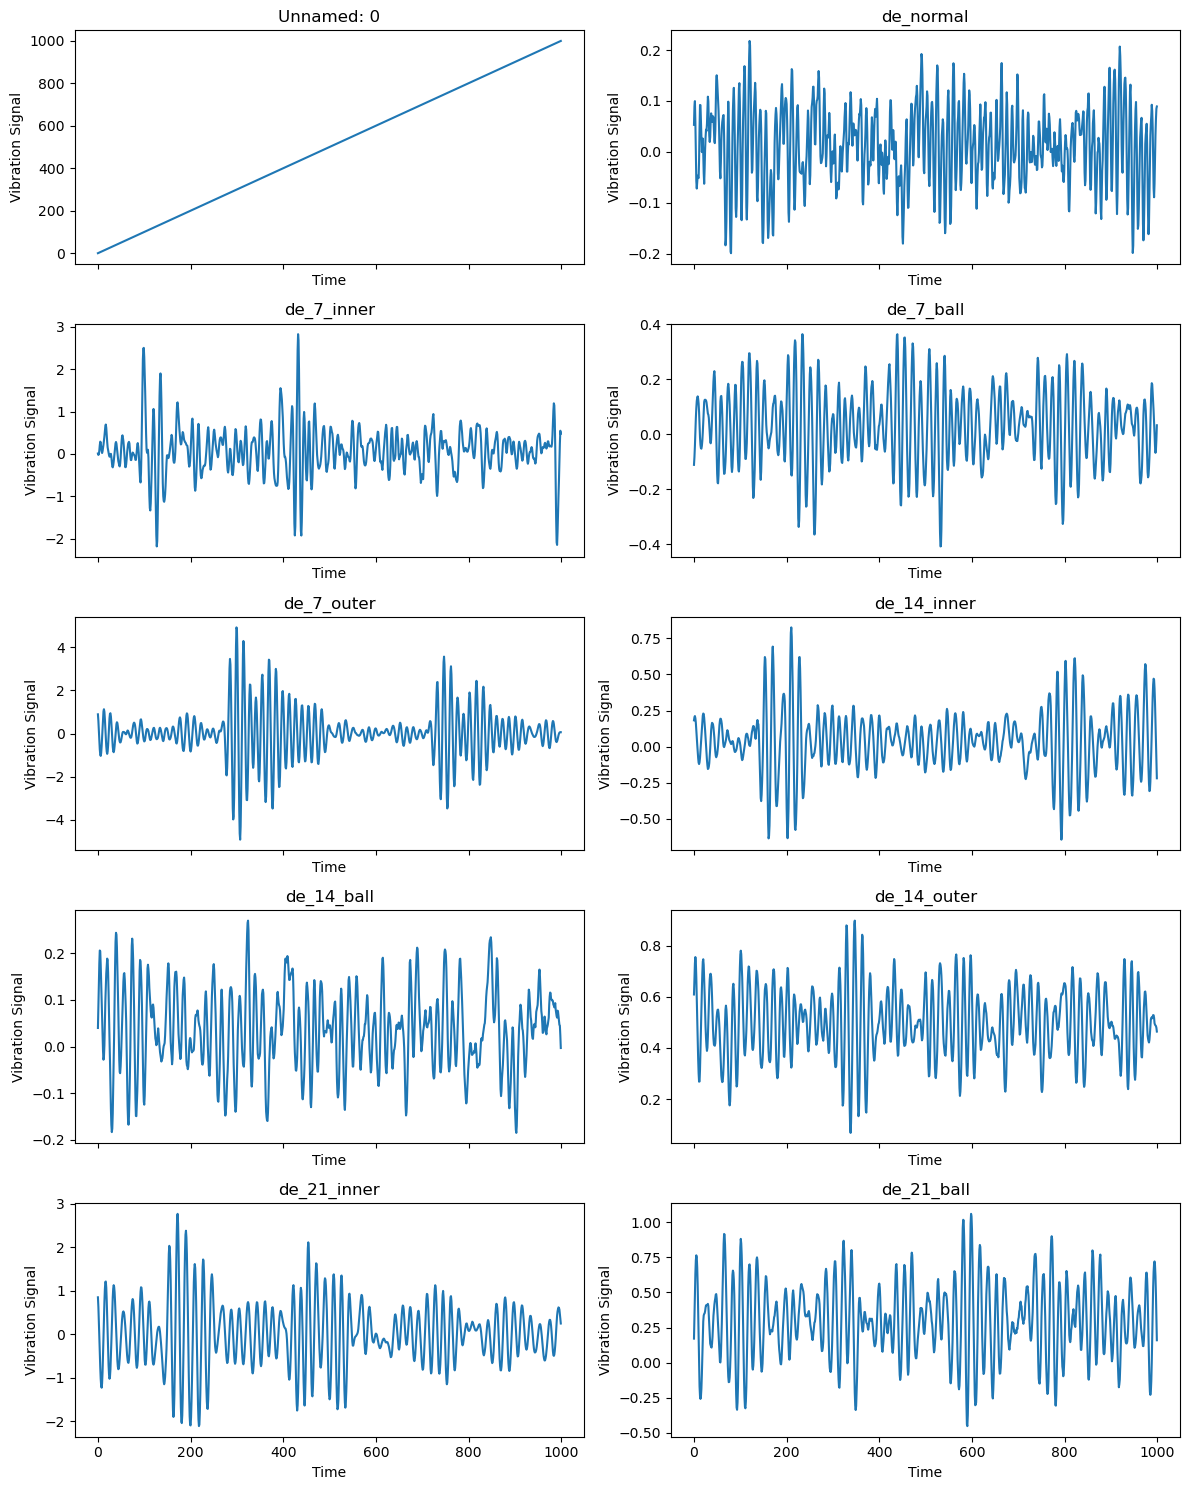

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
 
 
# 读取CSV文件的前1000行
df = pd.read_csv('data_12k_1797_10c.csv', nrows=1000)
 
# 获取列名
columns = df.columns
 
# 设置子图布局
fig, axs = plt.subplots(5, 2, figsize=(12, 15), sharex=True)
 
# 将列名按顺序分配给子图
for i in range(5):
    for j in range(2):
        index = i * 2 + j
        if index < len(columns):
            axs[i, j].plot(df[columns[index]])
            axs[i, j].set_title(columns[index])
            axs[i, j].set_xlabel('Time')
            axs[i, j].set_ylabel('Vibration Signal')
 
plt.savefig('my_sequence_plot.png')
            
# 调整布局
plt.tight_layout()

In [26]:
import pandas as pd
import numpy as np
 
# 读取 CSV 文件
df = pd.read_csv('data_12k_1797_10c.csv')
 
# 定义信号间隔长度和每块样本点数
interval_length = 1024
samples_per_block = 1024
 
 
# 数据前处理函数
def Sampling(signal, interval_length, samples_per_block):
    num_samples = len(signal)
    num_blocks = num_samples // samples_per_block
    samples = []
    for i in range(num_blocks):
        start = i * samples_per_block
        end = start + interval_length
        samples.append(signal[start:end])
    return np.array(samples)
 
def DataPreparation(df, interval_length, samples_per_block):
    X, LabelPositional, Label = None, None, None
    for count, column in enumerate(df.columns):
        SplitData = Sampling(df[column].values, interval_length, samples_per_block)
        y = np.zeros([len(SplitData), 11])
        y[:, count] = 1
        y1 = np.zeros([len(SplitData), 1])
        y1[:, 0] = count
        # 堆叠并标记数据
        if X is None:
            X = SplitData
            LabelPositional = y
            Label = y1
        else:
            X = np.append(X, SplitData, axis=0)
            LabelPositional = np.append(LabelPositional, y, axis=0)
            Label = np.append(Label, y1, axis=0)
    return X, LabelPositional, Label
 
# 数据前处理
X, Y_CNN, Y = DataPreparation(df, interval_length, samples_per_block)
 
print('Shape of Input Data =', X.shape)
print('Shape of Label Y_CNN =', Y_CNN.shape)
print('Shape of Label Y =', Y.shape)
 
 
# k折交叉验证
from sklearn.model_selection import train_test_split, KFold
kSplits = 5
kfold = KFold(n_splits=kSplits, random_state=32, shuffle=True)

Shape of Input Data = (682, 1024)
Shape of Label Y_CNN = (682, 11)
Shape of Label Y = (682, 1)


Epoch 1/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1309 - loss: 15.1987
Epoch 2/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1743 - loss: 2.0100
Epoch 3/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1959 - loss: 1.8759 
Epoch 4/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3802 - loss: 1.7410 
Epoch 5/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4522 - loss: 1.7097 
Epoch 6/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5336 - loss: 15.3216
Epoch 7/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3992 - loss: 1.5704
Epoch 8/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5504 - loss: 1.3689
Epoch 9/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6502 - loss: 1.1796 
Epoch 10/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6820 - loss: 0.9497
Epoch 11/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7802 - loss: 0.7187
Epoch 12/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.787

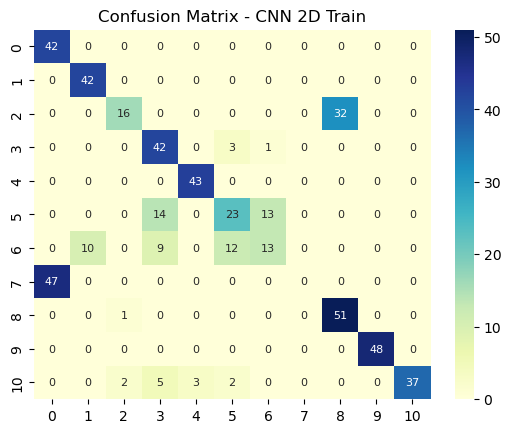

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


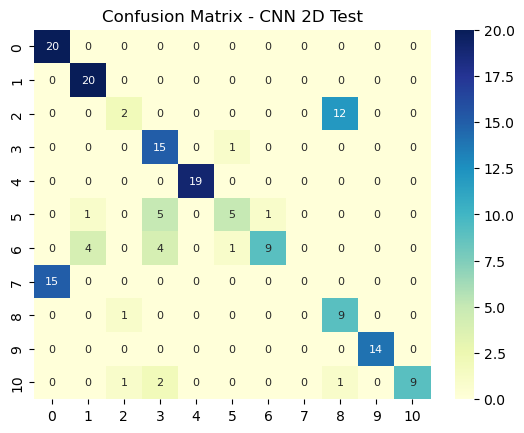

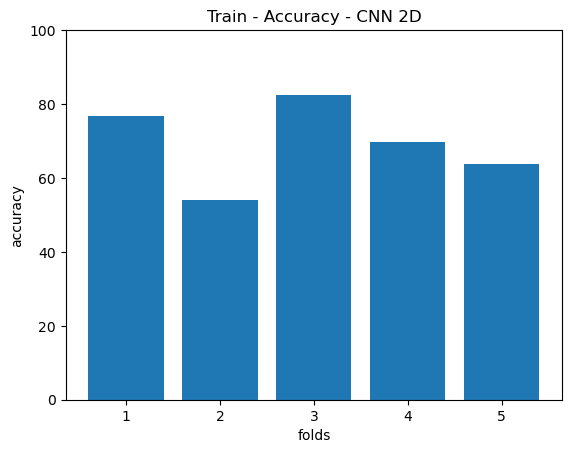

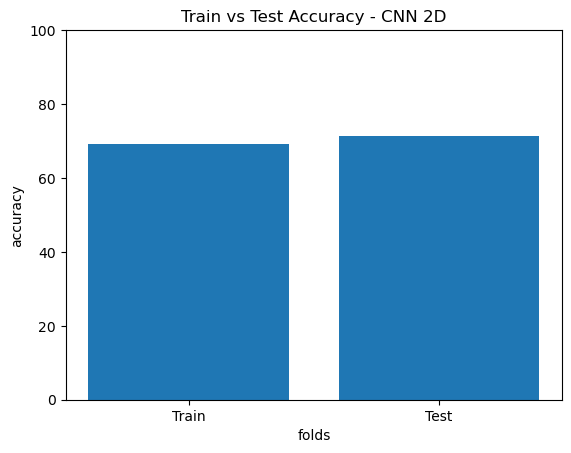

In [36]:
import tensorflow as tf
from tensorflow.keras import models, layers
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Reshape数据 - 修改为2D形式
Input_CNN = X.reshape([-1, 32, 32, 1])  # 将1024重塑为32x32的图像形式

# 数据集划分
X_CNN_train, X_CNN_test, y_CNN_train, y_CNN_test = train_test_split(Input_CNN, Y_CNN, train_size=0.75, test_size=0.25, random_state=101)

# 定义CNN模型
class CNN():
    def __init__(self):
        self.model = self.CreateModel()
        
    def CreateModel(self):
        model = models.Sequential([
            layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(32, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(11),  # 修改为11个输出节点，匹配目标数据维度
            layers.Softmax()
        ])
        model.compile(optimizer='adam',
                     loss=tf.keras.losses.CategoricalCrossentropy(),
                     metrics=['accuracy'])
        return model

accuracy_CNN = []

# 训练结果
for train, test in kfold.split(X_CNN_train, y_CNN_train):
    Classification_CNN = CNN()
    history = Classification_CNN.model.fit(X_CNN_train[train], y_CNN_train[train], verbose=1, epochs=12)
    kf_loss, kf_accuracy = Classification_CNN.model.evaluate(X_CNN_train[test], y_CNN_train[test]) 
    accuracy_CNN.append(kf_accuracy)
    
CNN_train_accuracy = np.average(accuracy_CNN)*100
print('CNN 2D train accuracy =', CNN_train_accuracy)

CNN_test_loss, CNN_test_accuracy = Classification_CNN.model.evaluate(X_CNN_test, y_CNN_test)
CNN_test_accuracy*=100
print('CNN 2D test accuracy =', CNN_test_accuracy)

def ConfusionMatrix(Model, X, y):
    y_pred = np.argmax(Model.model.predict(X), axis=1)
    ConfusionMat = confusion_matrix(np.argmax(y, axis=1), y_pred)
    return ConfusionMat
    
# 混淆矩阵可视化
plt.figure(1)
plt.title('Confusion Matrix - CNN 2D Train') 
sns.heatmap(ConfusionMatrix(Classification_CNN, X_CNN_train, y_CNN_train), annot=True, fmt='d', annot_kws={"fontsize":8}, cmap="YlGnBu")
plt.show()

plt.figure(2)
plt.title('Confusion Matrix - CNN 2D Test') 
sns.heatmap(ConfusionMatrix(Classification_CNN, X_CNN_test, y_CNN_test), annot=True, fmt='d', annot_kws={"fontsize":8}, cmap="YlGnBu")
plt.show()

plt.figure(3)
plt.title('Train - Accuracy - CNN 2D')
plt.bar(np.arange(1,kSplits+1),[i*100 for i in accuracy_CNN])
plt.ylabel('accuracy')
plt.xlabel('folds')
plt.ylim([0,100])
plt.show()

plt.figure(4)
plt.title('Train vs Test Accuracy - CNN 2D')
plt.bar([1,2],[CNN_train_accuracy,CNN_test_accuracy])
plt.ylabel('accuracy')
plt.xlabel('folds')
plt.xticks([1,2],['Train', 'Test'])
plt.ylim([0,100])
plt.show()

(63788, 10)
Shape of Input Data = (682, 1024)
Shape of Label Y_CNN = (682, 11)
Shape of Label Y = (682, 1)
Shape of RUL = (682, 1)
Epoch 1/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - classification_accuracy: 0.1275 - classification_loss: 85.5813 - loss: 263935.3438 - regression_loss: 263547.0625 - regression_mae: 150.0708  
Epoch 2/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - classification_accuracy: 0.1696 - classification_loss: 2.0777 - loss: 45769.4336 - regression_loss: 45721.7812 - regression_mae: 87.4400   
Epoch 3/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - classification_accuracy: 0.1922 - classification_loss: 2.0539 - loss: 101376.2344 - regression_loss: 101326.8984 - regression_mae: 112.0641
Epoch 4/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - classification_accuracy: 0.1853 - classification_loss: 2.0441 - loss: 35299.3984 - regression_loss: 35702.2578 - regression_mae: 70.8508
Epoch 5/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - classification_accuracy: 0.2252 - classification_

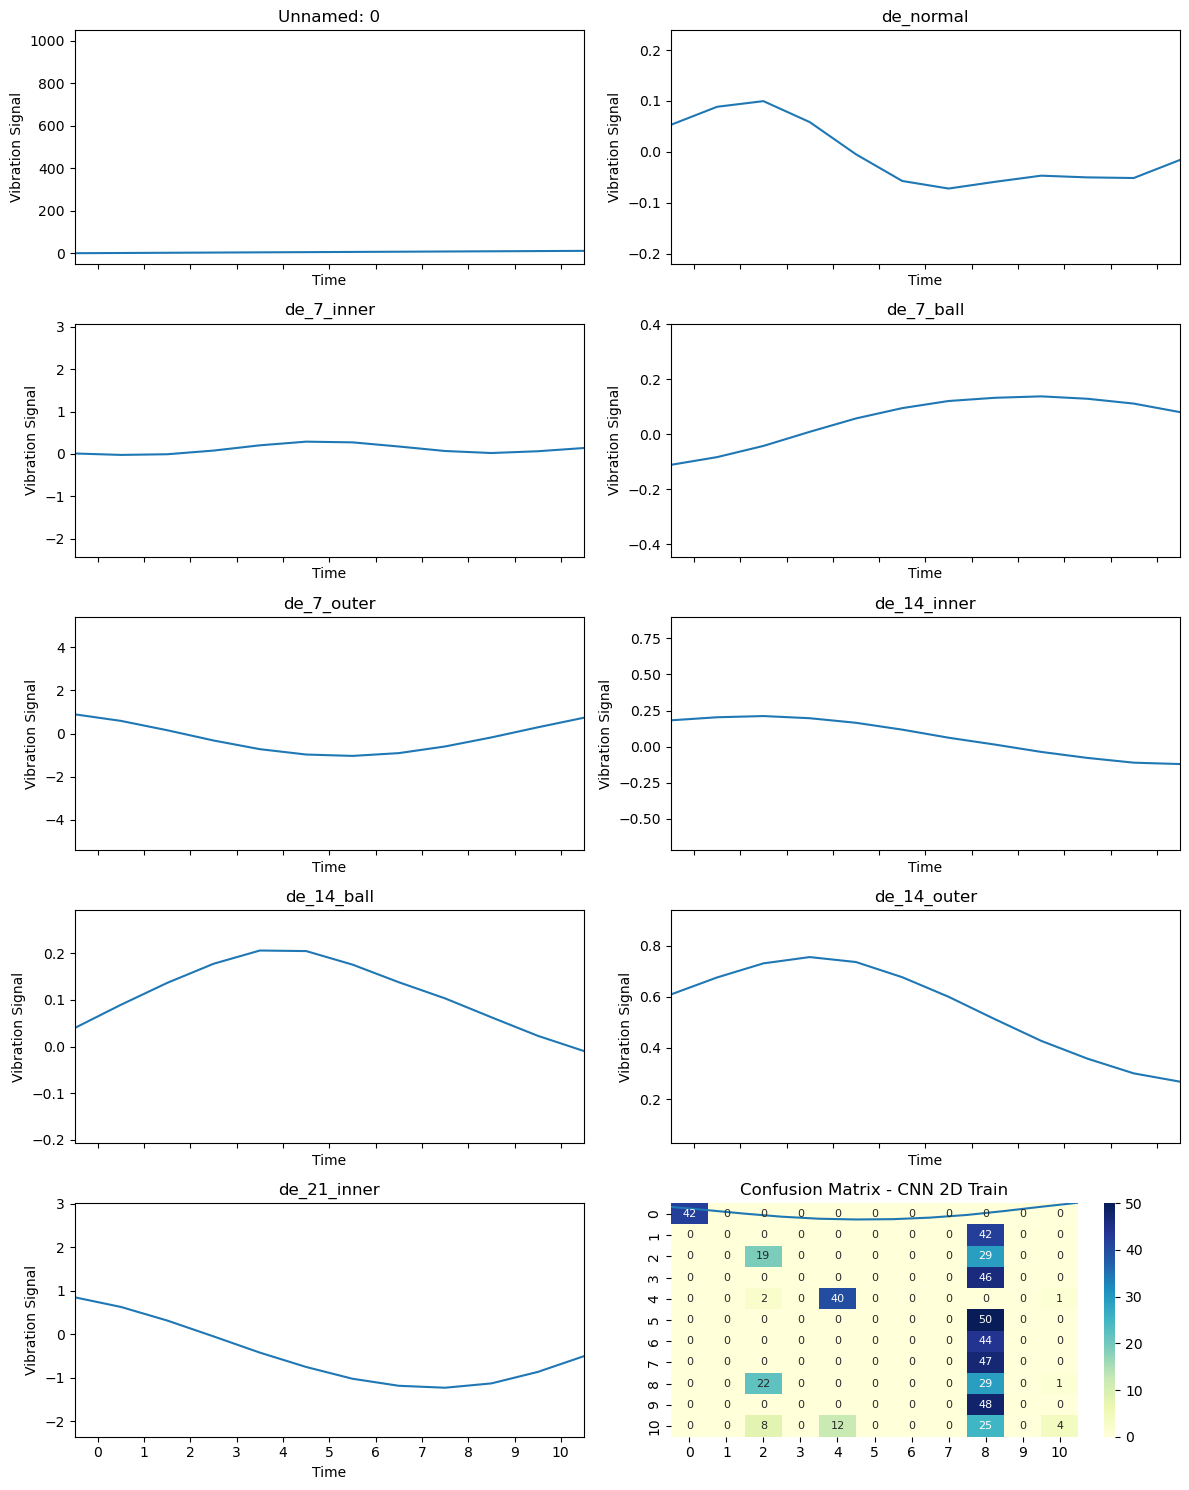

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


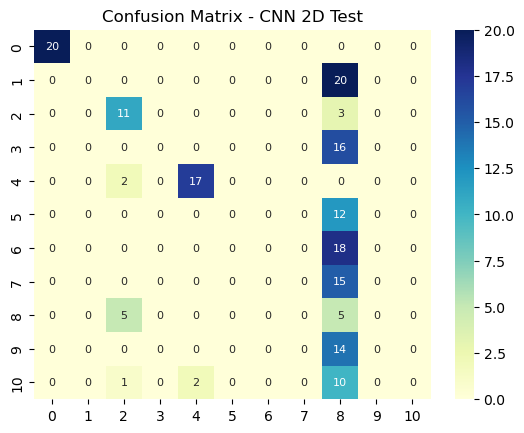

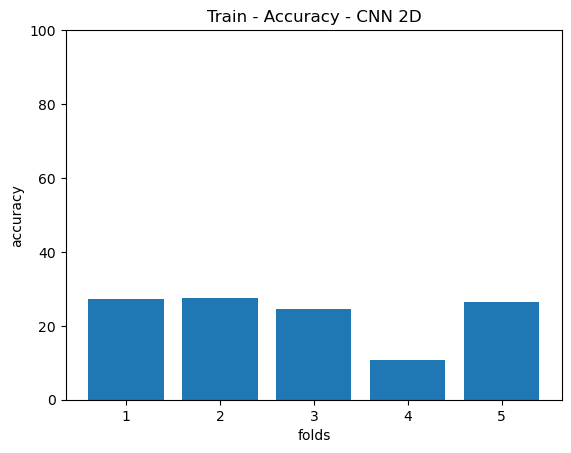

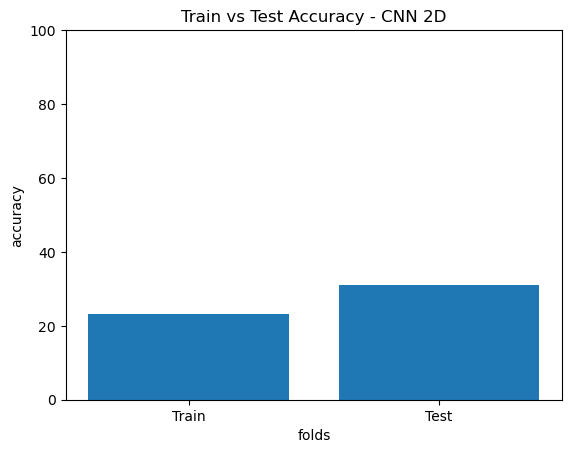

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


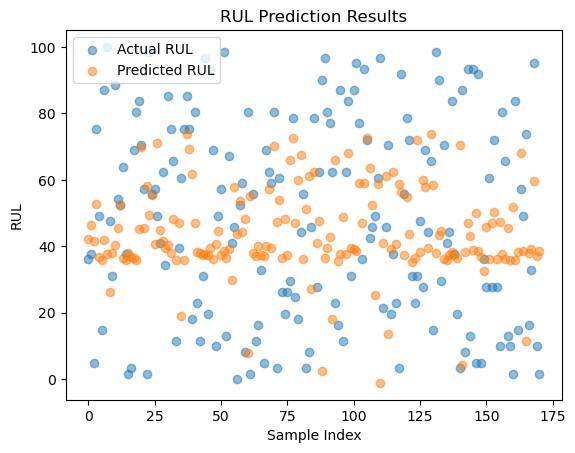

In [1]:
# 用Python读取第一个数据集IR007_0结果如下
from scipy import io as scio
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from tensorflow.keras import models, layers
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold

warnings.filterwarnings('ignore')

# 读取数据集
file_names = ['097','109', '122', '135', '173', '189', '201', '213', '226', '238']
data_columns = [f'X{filename}_DE_time' for filename in file_names]
columns_name = ['de_normal','de_7_inner','de_7_ball','de_7_outer','de_14_inner','de_14_ball','de_14_outer','de_21_inner','de_21_ball','de_21_outer']

data_12k_1797_10c = pd.DataFrame()

for index in range(10):
    data = loadmat(f'1/{file_names[index]}.mat')
    dataList = data[data_columns[index]].reshape(-1)
    data_12k_1797_10c[columns_name[index]] = dataList[:63788]
print(data_12k_1797_10c.shape)
data_12k_1797_10c.to_csv('data_12k_1797_10c.csv')

# 绘制时序图
df = pd.read_csv('data_12k_1797_10c.csv', nrows=1000)
columns = df.columns

fig, axs = plt.subplots(5, 2, figsize=(12, 15), sharex=True)
for i in range(5):
    for j in range(2):
        index = i * 2 + j
        if index < len(columns):
            axs[i, j].plot(df[columns[index]])
            axs[i, j].set_title(columns[index])
            axs[i, j].set_xlabel('Time')
            axs[i, j].set_ylabel('Vibration Signal')

plt.savefig('my_sequence_plot.png')
plt.tight_layout()

# 读取完整数据集
df = pd.read_csv('data_12k_1797_10c.csv')

# 定义参数
interval_length = 1024
samples_per_block = 1024

# 数据采样函数
def Sampling(signal, interval_length, samples_per_block):
    num_samples = len(signal)
    num_blocks = num_samples // samples_per_block
    samples = []
    for i in range(num_blocks):
        start = i * samples_per_block
        end = start + interval_length
        samples.append(signal[start:end])
    return np.array(samples)

# 数据预处理函数
def DataPreparation(df, interval_length, samples_per_block):
    X, LabelPositional, Label, RUL = None, None, None, None
    max_life = 100  # 假设最大寿命为100%
    
    for count, column in enumerate(df.columns):
        SplitData = Sampling(df[column].values, interval_length, samples_per_block)
        num_samples = len(SplitData)
        
        # 生成RUL标签（线性递减）
        rul_values = np.linspace(max_life, 0, num_samples).reshape(-1, 1)
        
        y = np.zeros([len(SplitData), 11])
        y[:, count] = 1
        y1 = np.zeros([len(SplitData), 1])
        y1[:, 0] = count
        
        if X is None:
            X = SplitData
            LabelPositional = y
            Label = y1
            RUL = rul_values
        else:
            X = np.append(X, SplitData, axis=0)
            LabelPositional = np.append(LabelPositional, y, axis=0)
            Label = np.append(Label, y1, axis=0)
            RUL = np.append(RUL, rul_values, axis=0)
            
    return X, LabelPositional, Label, RUL

# 数据预处理
X, Y_CNN, Y, RUL = DataPreparation(df, interval_length, samples_per_block)

print('Shape of Input Data =', X.shape)
print('Shape of Label Y_CNN =', Y_CNN.shape)
print('Shape of Label Y =', Y.shape)
print('Shape of RUL =', RUL.shape)

# Reshape数据为2D形式
Input_CNN = X.reshape([-1, 32, 32, 1])

# 数据集划分
X_CNN_train, X_CNN_test, y_CNN_train, y_CNN_test, rul_train, rul_test = train_test_split(
    Input_CNN, Y_CNN, RUL, train_size=0.75, test_size=0.25, random_state=101
)

# 定义CNN模型
class CNN():
    def __init__(self):
        self.model = self.CreateModel()
        
    def CreateModel(self):
        # 共享的特征提取层
        inputs = layers.Input(shape=(32, 32, 1))
        x = layers.Conv2D(16, (3, 3), activation='relu')(inputs)
        x = layers.MaxPooling2D((2, 2))(x)
        x = layers.Conv2D(32, (3, 3), activation='relu')(x)
        x = layers.MaxPooling2D((2, 2))(x)
        x = layers.Conv2D(64, (3, 3), activation='relu')(x)
        x = layers.MaxPooling2D((2, 2))(x)
        x = layers.Flatten()(x)
        
        # 故障分类分支
        classification = layers.Dense(128, activation='relu')(x)
        classification = layers.Dense(64, activation='relu')(classification)
        classification = layers.Dense(11, activation='softmax', name='classification')(classification)
        
        # RUL预测分支
        regression = layers.Dense(64, activation='relu')(x)
        regression = layers.Dense(32, activation='relu')(regression)
        regression = layers.Dense(1, name='regression')(regression)
        
        model = models.Model(inputs=inputs, outputs=[classification, regression])
        
        model.compile(optimizer='adam',
                     loss={
                         'classification': 'categorical_crossentropy',
                         'regression': 'mse'
                     },
                     metrics={
                         'classification': 'accuracy',
                         'regression': 'mae'
                     })
        return model

# K折交叉验证
kSplits = 5
kfold = KFold(n_splits=kSplits, random_state=32, shuffle=True)

accuracy_CNN = []
mae_CNN = []

# 训练和评估
for train, test in kfold.split(X_CNN_train, y_CNN_train):
    Classification_CNN = CNN()
    history = Classification_CNN.model.fit(
        X_CNN_train[train], 
        {
            'classification': y_CNN_train[train],
            'regression': rul_train[train]
        },
        verbose=1, 
        epochs=12
    )
    
    results = Classification_CNN.model.evaluate(
        X_CNN_train[test],
        {
            'classification': y_CNN_train[test],
            'regression': rul_train[test]
        }
    )
    accuracy_CNN.append(results[3])  # classification accuracy
    mae_CNN.append(results[4])      # regression MAE

# 打印训练结果
print('CNN 2D train classification accuracy =', np.mean(accuracy_CNN)*100)
print('CNN 2D train RUL MAE =', np.mean(mae_CNN))

# 测试集评估
test_results = Classification_CNN.model.evaluate(
    X_CNN_test,
    {
        'classification': y_CNN_test,
        'regression': rul_test
    }
)
print('CNN 2D test classification accuracy =', test_results[3]*100)
print('CNN 2D test RUL MAE =', test_results[4])

# 混淆矩阵可视化函数
def ConfusionMatrix(Model, X, y):
    y_pred = np.argmax(Model.model.predict(X)[0], axis=1)
    ConfusionMat = confusion_matrix(np.argmax(y, axis=1), y_pred)
    return ConfusionMat

# 绘制混淆矩阵
plt.figure(1)
plt.title('Confusion Matrix - CNN 2D Train') 
sns.heatmap(ConfusionMatrix(Classification_CNN, X_CNN_train, y_CNN_train), 
            annot=True, fmt='d', annot_kws={"fontsize":8}, cmap="YlGnBu")
plt.show()

plt.figure(2)
plt.title('Confusion Matrix - CNN 2D Test') 
sns.heatmap(ConfusionMatrix(Classification_CNN, X_CNN_test, y_CNN_test), 
            annot=True, fmt='d', annot_kws={"fontsize":8}, cmap="YlGnBu")
plt.show()

# 绘制训练准确率
plt.figure(3)
plt.title('Train - Accuracy - CNN 2D')
plt.bar(np.arange(1,kSplits+1),[i*100 for i in accuracy_CNN])
plt.ylabel('accuracy')
plt.xlabel('folds')
plt.ylim([0,100])
plt.show()

# 绘制训练vs测试准确率对比
plt.figure(4)
plt.title('Train vs Test Accuracy - CNN 2D')
plt.bar([1,2],[np.mean(accuracy_CNN)*100,test_results[3]*100])
plt.ylabel('accuracy')
plt.xlabel('folds')
plt.xticks([1,2],['Train', 'Test'])
plt.ylim([0,100])
plt.show()

# 绘制RUL预测结果
plt.figure(5)
plt.title('RUL Prediction Results')
predicted_rul = Classification_CNN.model.predict(X_CNN_test)[1]
plt.scatter(range(len(rul_test)), rul_test, label='Actual RUL', alpha=0.5)
plt.scatter(range(len(predicted_rul)), predicted_rul, label='Predicted RUL', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.show()

原始数据形状: (63788, 10)


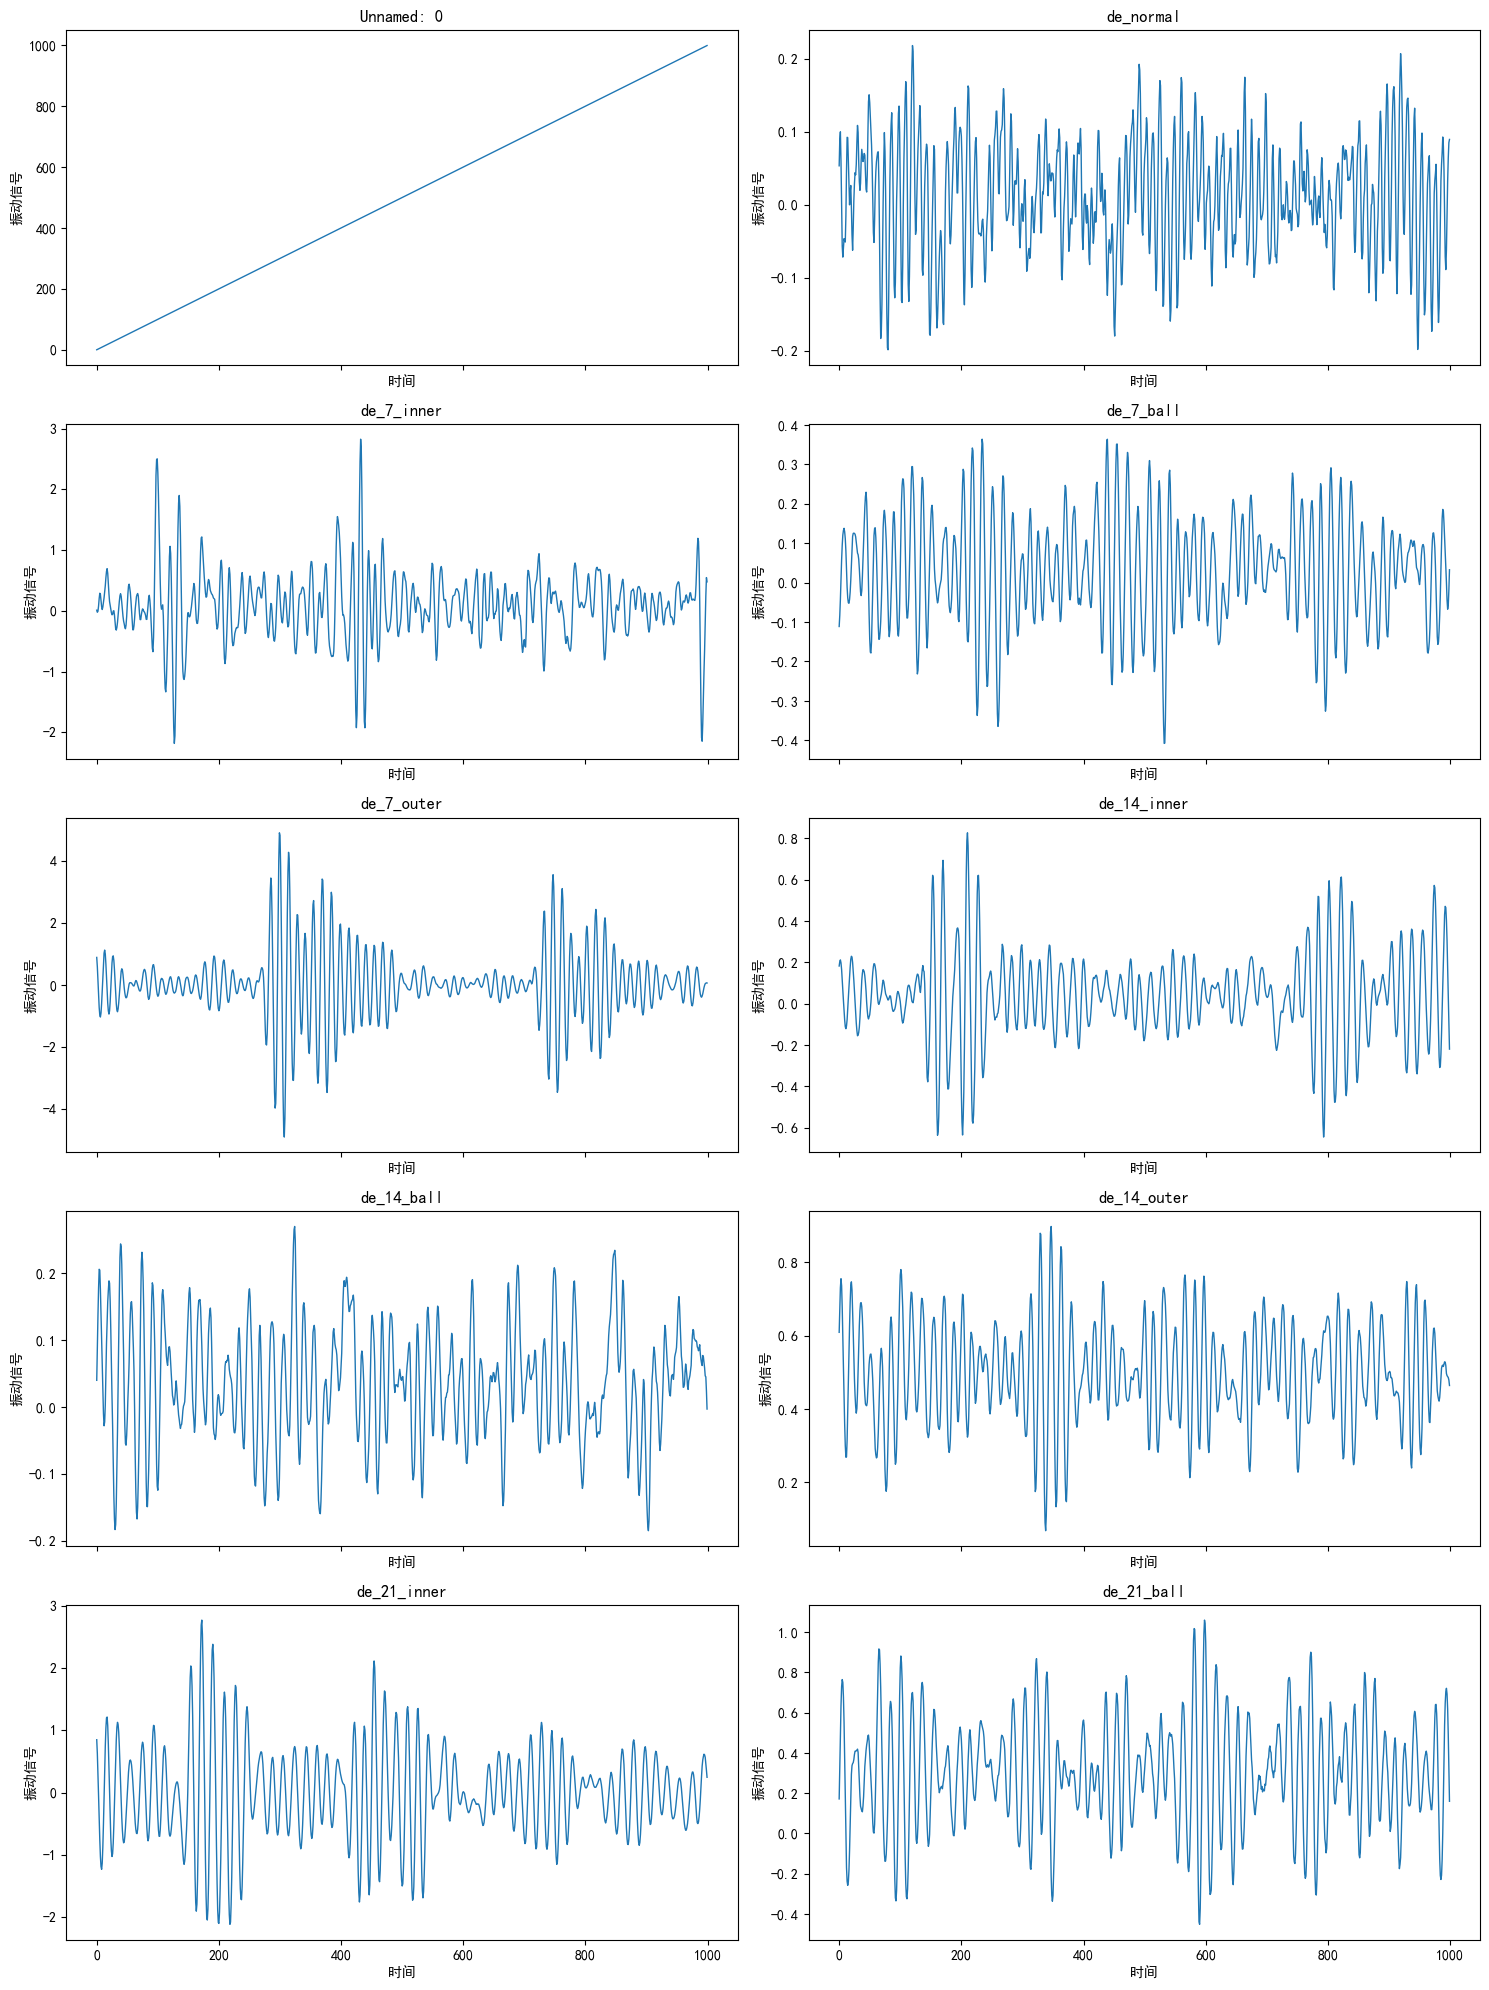

输入数据形状 = (682, 1024)
CNN标签形状 = (682, 11)
标签形状 = (682, 1)
RUL标签形状 = (682, 1)

训练折次 1/5
Epoch 1/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - classification_accuracy: 0.1062 - classification_loss: 15.0554 - loss: 149340.6094 - regression_loss: 149100.9688 - regression_mae: 98.8094 - val_classification_accuracy: 0.2427 - val_classification_loss: 1.8594 - val_loss: 51667.1211 - val_regression_loss: 88994.8672 - val_regression_mae: 108.1890
Epoch 2/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - classification_accuracy: 0.1340 - classification_loss: 2.0950 - loss: 139934.8594 - regression_loss: 139700.2656 - regression_mae: 124.7232 - val_classification_accuracy: 0.2621 - val_classification_loss: 1.7366 - val_loss: 3155.9592 - val_regression_loss: 3166.9849 - val_regression_mae: 47.1127
Epoch 3/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - classification_accuracy: 0.1786 - classification_loss: 1.9838 - loss: 10802.8174 - regression_loss: 10829.3643 - regression_mae: 60.0199 - val_classification_

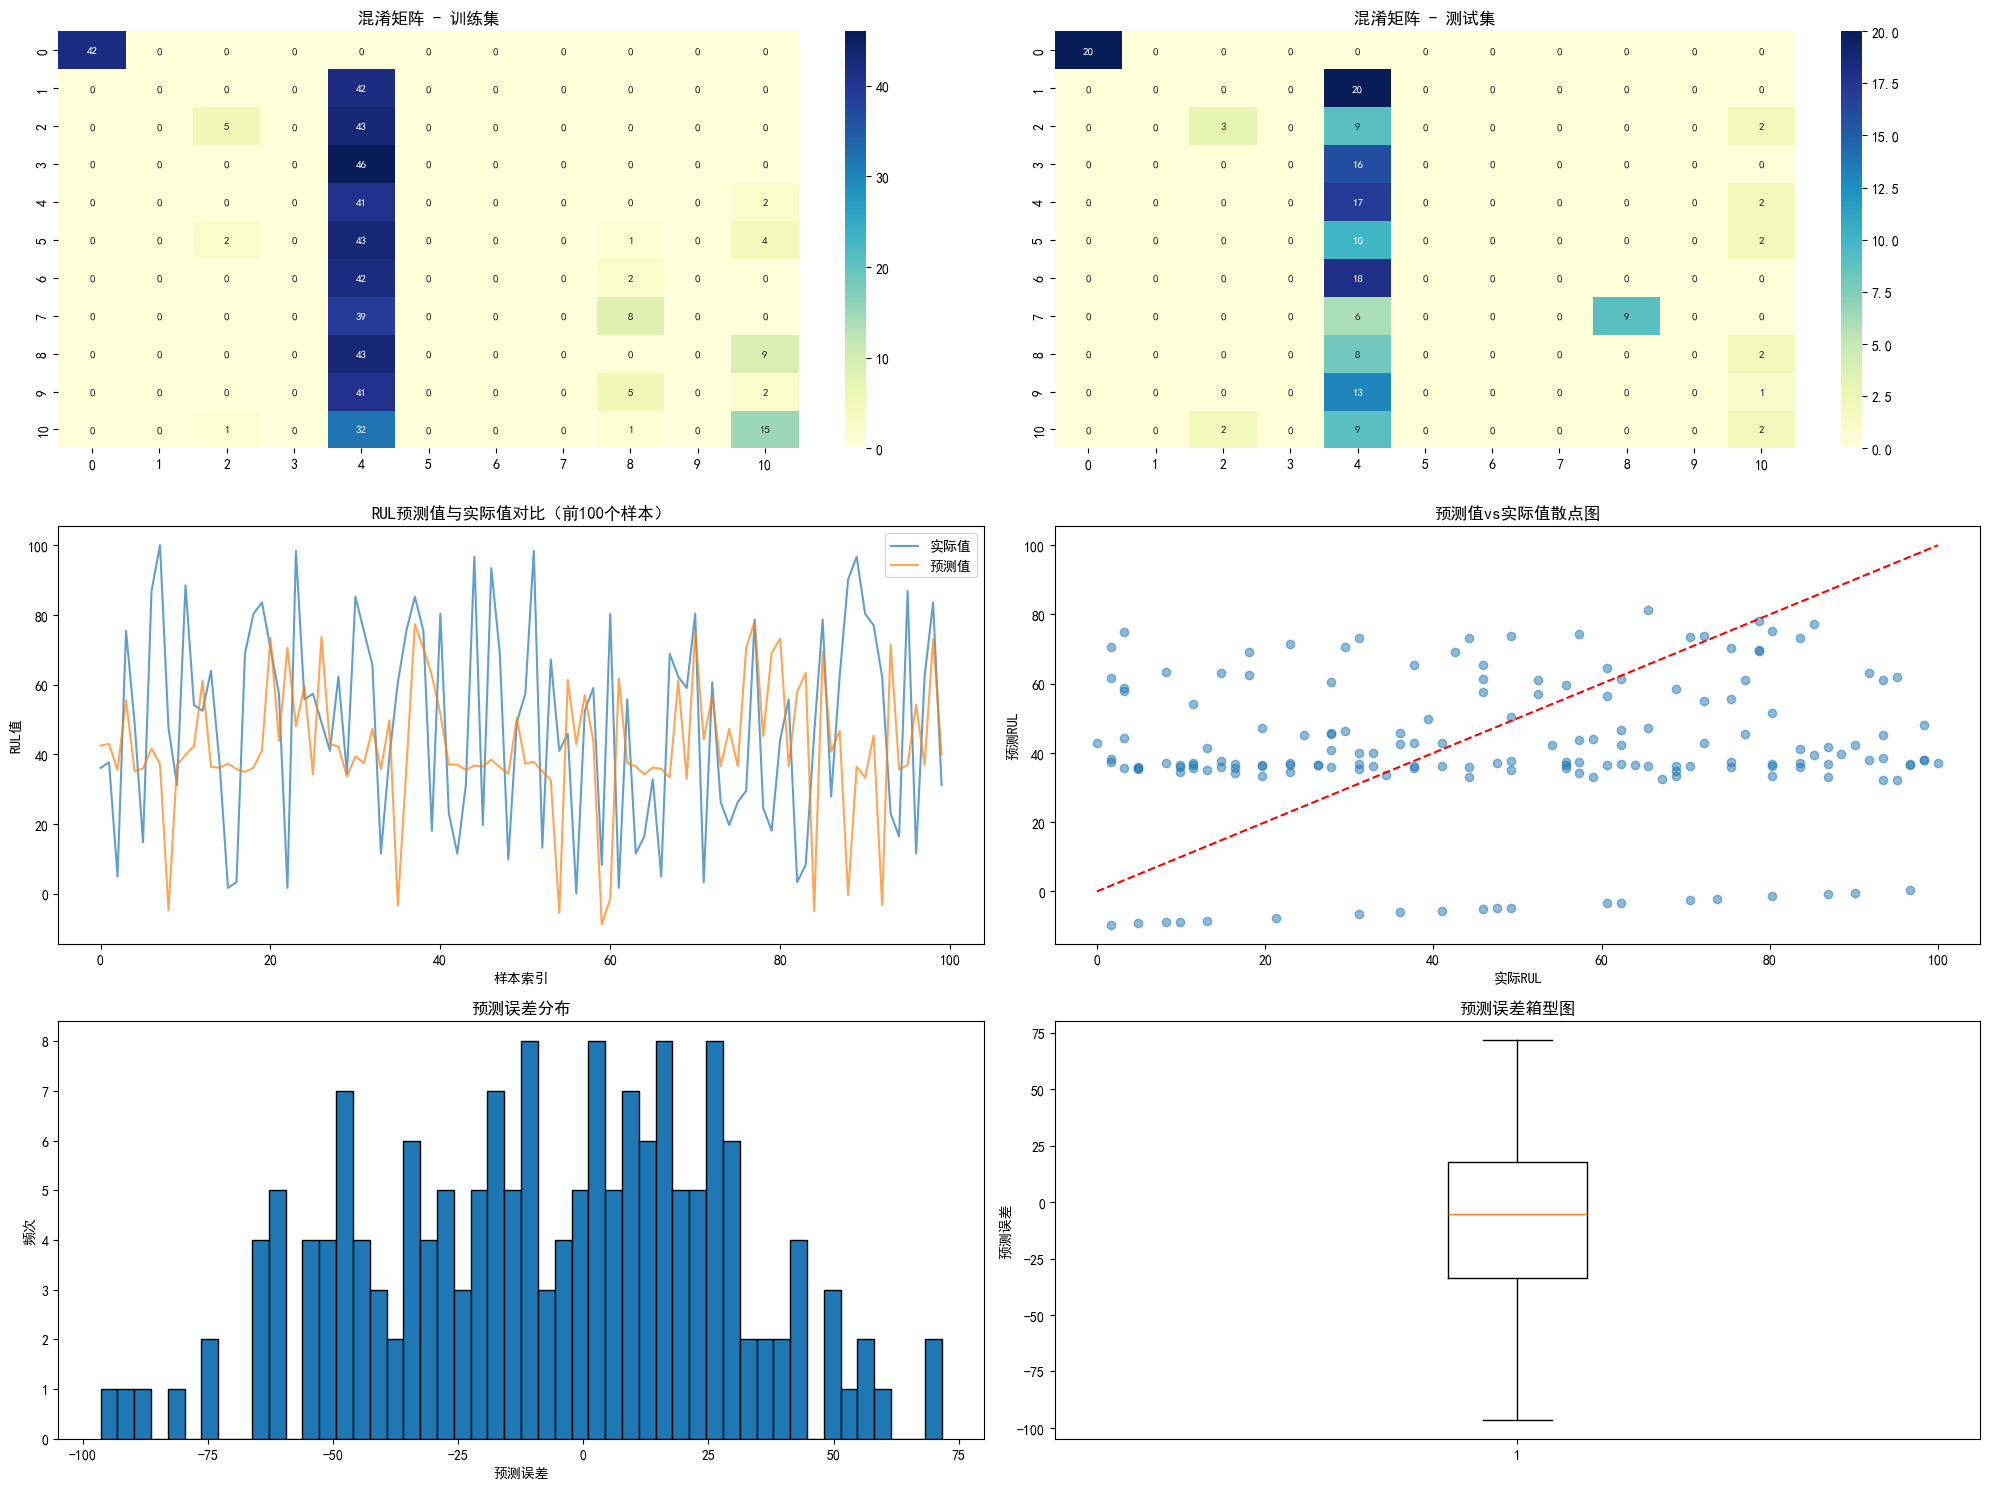

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

===== 各故障类型的RUL预测性能 =====

故障类型: 正常
样本数量: 20
MAE: 51.49
RMSE: 57.97

故障类型: 7内圈
样本数量: 20
MAE: 25.23
RMSE: 29.13

故障类型: 7滚动体
样本数量: 14
MAE: 30.15
RMSE: 36.04

故障类型: 7外圈
样本数量: 16
MAE: 32.98
RMSE: 37.78

故障类型: 14内圈
样本数量: 19
MAE: 21.44
RMSE: 28.22

故障类型: 14滚动体
样本数量: 12
MAE: 30.35
RMSE: 34.75

故障类型: 14外圈
样本数量: 18
MAE: 23.09
RMSE: 27.49

故障类型: 21内圈
样本数量: 15
MAE: 30.29
RMSE: 35.39

故障类型: 21滚动体
样本数量: 10
MAE: 23.42
RMSE: 29.85

故障类型: 21外圈
样本数量: 14
MAE: 23.16
RMSE: 27.89


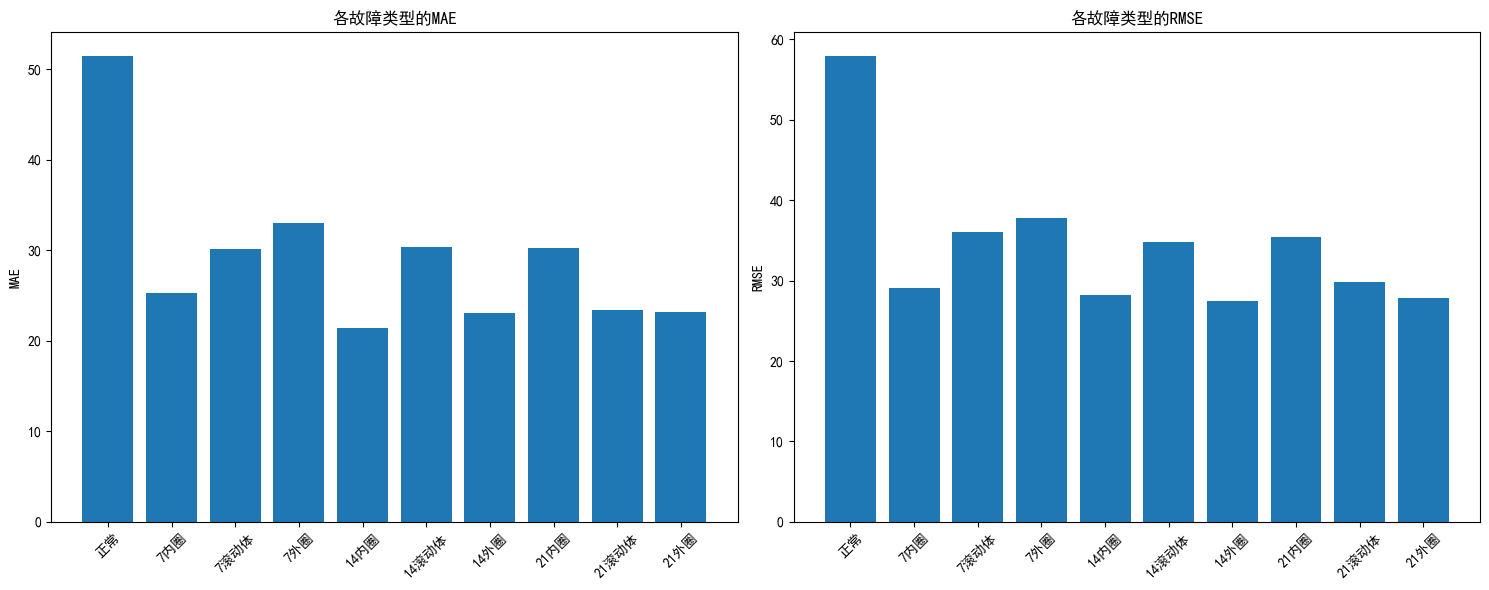


模型已保存为 'fault_diagnosis_rul_model.h5'


In [4]:
# 导入必要的库
from scipy import io as scio
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from tensorflow.keras import models, layers
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold

warnings.filterwarnings('ignore')

# 读取数据集
file_names = ['097','109', '122', '135', '173', '189', '201', '213', '226', '238']
data_columns = [f'X{filename}_DE_time' for filename in file_names]
columns_name = ['de_normal','de_7_inner','de_7_ball','de_7_outer','de_14_inner',
                'de_14_ball','de_14_outer','de_21_inner','de_21_ball','de_21_outer']

data_12k_1797_10c = pd.DataFrame()

# 读取并合并数据
for index in range(10):
    data = loadmat(f'1/{file_names[index]}.mat')
    dataList = data[data_columns[index]].reshape(-1)
    data_12k_1797_10c[columns_name[index]] = dataList[:63788]
print('原始数据形状:', data_12k_1797_10c.shape)
data_12k_1797_10c.to_csv('data_12k_1797_10c.csv')

# 数据可视化参数设置
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 绘制时序图
df = pd.read_csv('data_12k_1797_10c.csv', nrows=1000)
columns = df.columns

fig, axs = plt.subplots(5, 2, figsize=(15, 20), sharex=True)
for i in range(5):
    for j in range(2):
        index = i * 2 + j
        if index < len(columns):
            axs[i, j].plot(df[columns[index]], linewidth=1)
            axs[i, j].set_title(columns[index], fontsize=12)
            axs[i, j].set_xlabel('时间', fontsize=10)
            axs[i, j].set_ylabel('振动信号', fontsize=10)

plt.savefig('振动信号时序图.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# 读取完整数据集
df = pd.read_csv('data_12k_1797_10c.csv')

# 定义参数
interval_length = 1024
samples_per_block = 1024

def Sampling(signal, interval_length, samples_per_block):
    """信号采样函数"""
    num_samples = len(signal)
    num_blocks = num_samples // samples_per_block
    samples = []
    for i in range(num_blocks):
        start = i * samples_per_block
        end = start + interval_length
        samples.append(signal[start:end])
    return np.array(samples)

def DataPreparation(df, interval_length, samples_per_block):
    """数据预处理函数"""
    X, LabelPositional, Label, RUL = None, None, None, None
    max_life = 100  # 假设最大寿命为100%
    
    for count, column in enumerate(df.columns):
        SplitData = Sampling(df[column].values, interval_length, samples_per_block)
        num_samples = len(SplitData)
        
        # 生成RUL标签（线性递减）
        rul_values = np.linspace(max_life, 0, num_samples).reshape(-1, 1)
        
        y = np.zeros([len(SplitData), 11])
        y[:, count] = 1
        y1 = np.zeros([len(SplitData), 1])
        y1[:, 0] = count
        
        if X is None:
            X = SplitData
            LabelPositional = y
            Label = y1
            RUL = rul_values
        else:
            X = np.append(X, SplitData, axis=0)
            LabelPositional = np.append(LabelPositional, y, axis=0)
            Label = np.append(Label, y1, axis=0)
            RUL = np.append(RUL, rul_values, axis=0)
            
    return X, LabelPositional, Label, RUL
# 数据预处理
X, Y_CNN, Y, RUL = DataPreparation(df, interval_length, samples_per_block)

print('输入数据形状 =', X.shape)
print('CNN标签形状 =', Y_CNN.shape)
print('标签形状 =', Y.shape)
print('RUL标签形状 =', RUL.shape)

# Reshape数据为2D形式
Input_CNN = X.reshape([-1, 32, 32, 1])

# 数据集划分
X_CNN_train, X_CNN_test, y_CNN_train, y_CNN_test, rul_train, rul_test = train_test_split(
    Input_CNN, Y_CNN, RUL, train_size=0.75, test_size=0.25, random_state=101
)

class CNN():
    def __init__(self):
        self.model = self.CreateModel()
        
    def CreateModel(self):
        # 共享的特征提取层
        inputs = layers.Input(shape=(32, 32, 1))
        x = layers.Conv2D(16, (3, 3), activation='relu')(inputs)
        x = layers.MaxPooling2D((2, 2))(x)
        x = layers.Conv2D(32, (3, 3), activation='relu')(x)
        x = layers.MaxPooling2D((2, 2))(x)
        x = layers.Conv2D(64, (3, 3), activation='relu')(x)
        x = layers.MaxPooling2D((2, 2))(x)
        x = layers.Flatten()(x)
        
        # 故障分类分支
        classification = layers.Dense(128, activation='relu')(x)
        classification = layers.Dense(64, activation='relu')(classification)
        classification = layers.Dense(11, activation='softmax', name='classification')(classification)
        
        # RUL预测分支
        regression = layers.Dense(64, activation='relu')(x)
        regression = layers.Dense(32, activation='relu')(regression)
        regression = layers.Dense(1, name='regression')(regression)
        
        model = models.Model(inputs=inputs, outputs=[classification, regression])
        
        model.compile(optimizer='adam',
                     loss={
                         'classification': 'categorical_crossentropy',
                         'regression': 'mse'
                     },
                     metrics={
                         'classification': 'accuracy',
                         'regression': 'mae'
                     })
        return model

# K折交叉验证设置
kSplits = 5
kfold = KFold(n_splits=kSplits, random_state=32, shuffle=True)

accuracy_CNN = []
mae_CNN = []

# 训练和评估
for fold, (train, test) in enumerate(kfold.split(X_CNN_train, y_CNN_train)):
    print(f'\n训练折次 {fold + 1}/{kSplits}')
    Classification_CNN = CNN()
    history = Classification_CNN.model.fit(
        X_CNN_train[train], 
        {
            'classification': y_CNN_train[train],
            'regression': rul_train[train]
        },
        validation_data=(
            X_CNN_train[test],
            {
                'classification': y_CNN_train[test],
                'regression': rul_train[test]
            }
        ),
        verbose=1, 
        epochs=12
    )
    
    results = Classification_CNN.model.evaluate(
        X_CNN_train[test],
        {
            'classification': y_CNN_train[test],
            'regression': rul_train[test]
        }
    )
    accuracy_CNN.append(results[3])  # classification accuracy
    mae_CNN.append(results[4])      # regression MAE
    
    print(f'折次 {fold + 1} - 分类准确率: {results[3]*100:.2f}%, RUL MAE: {results[4]:.2f}')

# 打印训练结果
print('\n===== 训练结果汇总 =====')
print(f'平均分类准确率: {np.mean(accuracy_CNN)*100:.2f}%')
print(f'平均RUL MAE: {np.mean(mae_CNN):.2f}')

# 测试集评估
test_results = Classification_CNN.model.evaluate(
    X_CNN_test,
    {
        'classification': y_CNN_test,
        'regression': rul_test
    }
)
print('\n===== 测试集结果 =====')
print(f'测试集分类准确率: {test_results[3]*100:.2f}%')
print(f'测试集RUL MAE: {test_results[4]:.2f}')

# 混淆矩阵可视化函数
def ConfusionMatrix(Model, X, y):
    y_pred = np.argmax(Model.model.predict(X)[0], axis=1)
    ConfusionMat = confusion_matrix(np.argmax(y, axis=1), y_pred)
    return ConfusionMat

# 预测RUL并分析结果
predicted_rul = Classification_CNN.model.predict(X_CNN_test)[1]

# 1. 显示部分预测结果的数值对比
print("\n===== RUL预测结果示例 =====")
print("前10个样本的预测结果对比：")
comparison_df = pd.DataFrame({
    '实际RUL': rul_test.flatten()[:10],
    '预测RUL': predicted_rul.flatten()[:10],
    '误差': np.abs(rul_test.flatten()[:10] - predicted_rul.flatten()[:10])
})
print(comparison_df.round(2))

# 2. 计算整体预测性能指标
mae = np.mean(np.abs(rul_test - predicted_rul))
rmse = np.sqrt(np.mean((rul_test - predicted_rul)**2))
print(f"\n整体预测性能：")
print(f"平均绝对误差 (MAE): {mae:.2f}")
print(f"均方根误差 (RMSE): {rmse:.2f}")

# 3. 结果可视化
plt.figure(figsize=(20, 15))

# 3.1 混淆矩阵 - 训练集
plt.subplot(3, 2, 1)
plt.title('混淆矩阵 - 训练集')
sns.heatmap(ConfusionMatrix(Classification_CNN, X_CNN_train, y_CNN_train), 
            annot=True, fmt='d', annot_kws={"fontsize":8}, cmap="YlGnBu")

# 3.2 混淆矩阵 - 测试集
plt.subplot(3, 2, 2)
plt.title('混淆矩阵 - 测试集')
sns.heatmap(ConfusionMatrix(Classification_CNN, X_CNN_test, y_CNN_test), 
            annot=True, fmt='d', annot_kws={"fontsize":8}, cmap="YlGnBu")

# 3.3 RUL预测值与实际值的对比图
plt.subplot(3, 2, 3)
plt.title('RUL预测值与实际值对比（前100个样本）')
plt.plot(rul_test[:100], label='实际值', alpha=0.7)
plt.plot(predicted_rul[:100], label='预测值', alpha=0.7)
plt.xlabel('样本索引')
plt.ylabel('RUL值')
plt.legend()

# 3.4 预测值与实际值的散点图
plt.subplot(3, 2, 4)
plt.title('预测值vs实际值散点图')
plt.scatter(rul_test, predicted_rul, alpha=0.5)
plt.plot([0, 100], [0, 100], 'r--')  # 理想预测线
plt.xlabel('实际RUL')
plt.ylabel('预测RUL')

# 3.5 预测误差分布直方图
plt.subplot(3, 2, 5)
errors = (predicted_rul - rul_test).flatten()
plt.title('预测误差分布')
plt.hist(errors, bins=50, edgecolor='black')
plt.xlabel('预测误差')
plt.ylabel('频次')

# 3.6 误差箱型图
plt.subplot(3, 2, 6)
plt.title('预测误差箱型图')
plt.boxplot(errors)
plt.ylabel('预测误差')

plt.tight_layout()
plt.show()

# 4. 按故障类型分析预测性能
fault_types = ['正常', '7内圈', '7滚动体', '7外圈', '14内圈', 
               '14滚动体', '14外圈', '21内圈', '21滚动体', '21外圈']

# 获取每个样本的预测类别
predicted_classes = np.argmax(Classification_CNN.model.predict(X_CNN_test)[0], axis=1)
actual_classes = np.argmax(y_CNN_test, axis=1)

# 创建一个图表来显示各故障类型的性能
plt.figure(figsize=(15, 6))
mae_by_type = []
rmse_by_type = []

print("\n===== 各故障类型的RUL预测性能 =====")
for i in range(len(fault_types)):
    mask = (actual_classes == i)
    if np.sum(mask) > 0:  # 确保该类别有样本
        mae_i = np.mean(np.abs(rul_test[mask] - predicted_rul[mask]))
        rmse_i = np.sqrt(np.mean((rul_test[mask] - predicted_rul[mask])**2))
        mae_by_type.append(mae_i)
        rmse_by_type.append(rmse_i)
        print(f"\n故障类型: {fault_types[i]}")
        print(f"样本数量: {np.sum(mask)}")
        print(f"MAE: {mae_i:.2f}")
        print(f"RMSE: {rmse_i:.2f}")

# 绘制各故障类型的MAE和RMSE对比图
plt.subplot(1, 2, 1)
plt.title('各故障类型的MAE')
plt.bar(fault_types, mae_by_type)
plt.xticks(rotation=45)
plt.ylabel('MAE')

plt.subplot(1, 2, 2)
plt.title('各故障类型的RMSE')
plt.bar(fault_types, rmse_by_type)
plt.xticks(rotation=45)
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

# 保存模型
Classification_CNN.model.save('fault_diagnosis_rul_model.h5')
print("\n模型已保存为 'fault_diagnosis_rul_model.h5'")